In [2]:
import pandas as pd 
import cv2
import matplotlib.pyplot as plt  
import numpy as np
import requests
import time

In [1]:
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc

width = 1280
height = 720
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./noise.avi', fourcc, float(FPS), (width, height))

for _ in range(FPS*seconds):
    frame = np.random.randint(0, 256, 
                              (height, width, 3), 
                              dtype=np.uint8)
    video.write(frame)
video.release()

In [14]:
url = "http://192.168.43.1:8080/shot.jpg"
#vid = cv2.VideoCapture(0)
ImageData=[]
update=0
beats=0
updatestarttime=0
starttime=0
totalbeats=0
text='Wait'
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    #ret, img = vid.read()
    
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    
    img = cv2.resize(img, (400,400))
    
    b,g,r = cv2.split(img)
    
        
    ImageData.append(np.average(img))
    if len(ImageData)>20:
        ImageData.pop(0)
        averagevalue=np.average(ImageData)
        if ImageData[-2]<=averagevalue and ImageData[-1]>averagevalue:
            beats+=1
            totalbeats+=1
        
        updatestarttime+=1
        if updatestarttime%20==0:
            if starttime!=0:
                timediff=time.time()-starttime
                pulse=beats/timediff
                text='Pulse: {}'.format(int(pulse*60))
            else:
                text="Calculating"  
            
            starttime=time.time()
            beats=0

    text2=str(totalbeats)
    if np.average(r)<210:
        ImageData=[]
        beats=0
        totalbeats=0
        updatestarttime=0
        text='PUT YOUR FINGER ON CAMERA'
    
    img=cv2.putText(img, text, (30,150), font, 
            0.7, (0,250,0), 2, cv2.LINE_AA)
    try:
        img=cv2.putText(img, text2, (60,200), font, 
                0.7, (0,250,0), 2, cv2.LINE_AA)
    except:
        pass
    
    cv2.imshow("Heart Rate", img)


    # Press Esc key to exit
    if cv2.waitKey(1) == 27:
        break
#vid.release()
cv2.destroyAllWindows()

In [66]:
url = "http://192.168.43.1:8080/shot.jpg"
ImageData=[]
update=0
text='Wait'
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    img = cv2.resize(img, (400,400))
    b,g,r = cv2.split(img)
    ImageData.append(np.average(img))
    if len(ImageData)>60:#100 frame so we can get upto freq50 Hz which equals to 50*3.14*2 heart beat
        ImageData.pop(0)
    
    if update%15==0 and len(ImageData)>=60:#Refresh every 15 frame
        n=len(ImageData)
        fhat=np.fft.fft(ImageData,n)
        PSD=fhat*np.conj(fhat)/n
        PSD=PSD[6:30]#offset of 6, for valid heartbeat which is under 5-36beats otherwise fails
        maxval=np.max(PSD)
        pulse=np.array(np.where(PSD>(9*maxval/10))).astype(np.float32)
        pulse+=6#offset cleared
        pulse=2*3.14*pulse
        pulse=int(np.average(pulse))
        if pulse>=40:
            text='Pulse: {}'.format(pulse)
        else:
            text='PUT YOUR FINGER ON CAMERA'
        if np.average(r)<210:
            ImageData=[]
            text='PUT YOUR FINGER ON CAMERA'
            
    
    img=cv2.rectangle(img, (0,0), (400,250), (180,100,70),-1)
    img=cv2.putText(img, text, (30,150), font, 
            0.7, (0,250,0), 2, cv2.LINE_AA)
    
    update+=1
    cv2.imshow("Heart Rate", img)


	# Press Esc key to exit
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()

ConnectionError: HTTPConnectionPool(host='192.168.43.1', port=8080): Max retries exceeded with url: /shot.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002503D83FAC0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [70]:
len(ImageData)

12

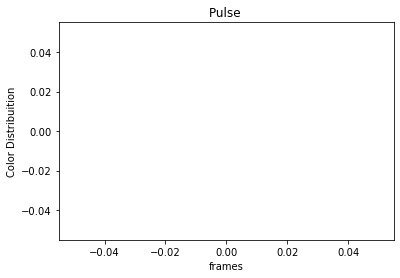

In [7]:
plt.plot(list(range(len(ImageData))),ImageData,color='k')
plt.xlabel('frames')
plt.ylabel('Color Distribuition')
plt.title('Pulse ')
plt.show()

#Analysis Here

In [2]:
cap = cv2.VideoCapture(r'C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\HeartRate\72.mp4')
Colordata1=[]
grayscaledata1=[]
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)
        grayframe=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        grayscaledata1.append(np.sum(grayframe)/(grayframe.shape[0]*grayframe.shape[1]))


        # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break
cap.release()
cv2.destroyAllWindows()


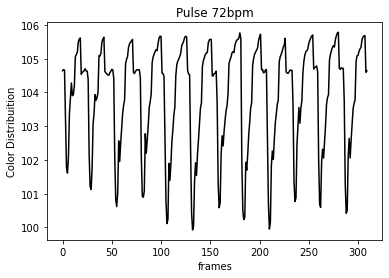

In [4]:
plt.plot(list(range(len(grayscaledata1))),grayscaledata1,color='k')
plt.xlabel('frames')
plt.ylabel('Color Distribuition')
plt.title('Pulse 72bpm')
plt.show()

#Using FFT to find wave in Heart

In [5]:
n1=len(grayscaledata1)

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


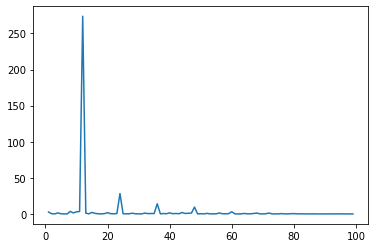

In [17]:
fhat1=np.fft.fft(grayscaledata1,n1)
PSD1=fhat1*np.conj(fhat1)/n1
freq1=np.arange(100)#Between 0 and freq plot
L1=np.arange(1,np.floor(100),dtype='int')#Since Half is just symmetrical
plt.plot(freq1[L1],PSD1[L1])
plt.show()